In [1]:
import nltk
from os import getcwd
import pandas as pd
from nltk.corpus import twitter_samples,stopwords 
from nltk.tokenize import word_tokenize 
import string
import validators
import numpy as np
import pandas as pd
from nltk.stem import PorterStemmer 
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
path = "C:\\Users\\HP\\Desktop\\tweets.csv"
import codecs
with codecs.open(path, "r",encoding='utf-8', errors='ignore') as file_data:
     df = pd.read_csv(file_data)
print(df.head())
tweet_proc_list_strings = df.tweet.to_list()
LABEL = df.value.to_list()
print(LABEL)

                                               tweet  value
0  The perfect #covid19 Middle Eastern football p...      1
1  @A4Ny14 A mask mandate is a good thing, but I ...      1
2   @UKCovid19Stats 12 deaths....oooh scary #COVID19      0
3  @_Norwegian_Blue It’s incredible the neolibera...      1
4  @DoctorJohn_MD how did you contract #COVID19 #...      0
[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [3]:
def Process_Tweet(tweet):
  tweet = tweet.replace("n't"," not").replace("'m"," am").replace("'ve"," have").replace("’","'").replace('`','')
  tweet = tweet.split()
  alphabets = "qwertyuioplkjhgfdsazxcvbnm"
  stop_words = set(stopwords.words('english'))
  tweet = [w.lower() for w in tweet if w not in stop_words and w[0] not in string.punctuation and not validators.url(w) and w[0] in alphabets]
  tweet = word_tokenize(" ".join(tweet))
  tweet = ["<s>"]+[ps.stem(w) for w in tweet if w not in string.punctuation] +["<\s>"]
  out = []
  for i in range(0,len(tweet)):
    out.append(tweet[i])#+" "+tweet[i+1]+" "+tweet[i+2])
  return out

In [4]:
tweet_proc_list = []
postive_list = []
negative_list = []
processsed_i = []
train_x = []
Y = []
change = 0
vocab = set()
for i in range(len(tweet_proc_list_strings)):
  processsed_i = Process_Tweet(tweet_proc_list_strings[i])
  print("\rTweets",str(i+1),":",processsed_i,end="")
  if processsed_i != []:
    vocab.update(processsed_i)
    if LABEL[i]==1:
      Y.append(1)
      postive_list = postive_list + processsed_i
    else:
      Y.append(0)
      negative_list = negative_list + processsed_i
    tweet_proc_list.append(processsed_i)
print("\nNumber of tweets:", len(train_x),len(Y))
vocab = list(vocab)
print("\nVocab Size:",len(vocab))

Tweets 10000 : ['<s>', 'outbreak', 'latest', '<\\s>'] 'wor…', '<\\s>']'lea…', '<\\s>']', 'grandparents…', '<\\s>']ockdown', 'anymore…', '<\\s>']s>']']s', 't…', '<\\s>']>']'feed', 'die', 'there', '<\\s>']: ['<s>', 'brother', 'die', 'thousand', 'sick', 'die', 'take', 'respon…', '<\\s>'] ['<s>', 'found', 'given', 'examin', 'thousand', 'student', 'quarantine…', '<\\s>']['<s>', 'impact', 'devast', 'work', 'home', 'elev', 'exposu…', '<\\s>']['<s>', 'proud', 'class', 'fellow', 'shout-out', 's…', '<\\s>'] : ['<s>', 'bless', 'danger', '<\\s>'] 5220 : ['<s>', 'still', 'ban', 'stup', '...', 'meant', 'innoc', 'adventur', 'peopl', 'bitch', 'done…', '<\\s>'] ['<s>', 'still', 'get', 'it', 'say', 'pandem', 'task', 'forc', 'sourc', 'spout', 'latest', 'delusions…', '<\\s>'] : ['<s>', 'studi', 'led', 'member', 'plan', 'recruit', 'children', 'aim', 't…', '<\\s>'] 6277 : ['<s>', 'true', '...', '..lol', 'politician', 'use', 'damn', 'elect', 'gimmick', 'go', 'squeez', 'like', 'damn…', '<\\s>']['<s>', 'media'

In [5]:
positive_count = dict()
negative_count = dict()
for j in range(len(vocab)):
  i = vocab[j]
  print("\r",j,"/",len(vocab),end="")
  if postive_list.count(i)>0:
    positive_count[i] = postive_list.count(i)
  if negative_list.count(i)>0:
    negative_count[i] = negative_list.count(i)

 8579 / 8580580 858085808580 8580 / 8580 / 8580 / 8580858085805487 / 858085808281 / 85808365 / 8580

In [6]:
def get_score(i,dictionary):
  return sum([dictionary[w] for w in i if w in dictionary.keys()])/100

In [7]:
X = []
for i in tweet_proc_list:
  k = 0
  pos_list = [0]*25
  neg_list = [0]*25
  for x in range(1,len(i)-1):
      j = i[x]
      if j in positive_count.keys():
          pos_list[k] += positive_count[j]
      if j in negative_count.keys():
          neg_list[k] += negative_count[j]
      k+=1
  X.append([pos_list,neg_list])

In [8]:
X_array = np.array(X).reshape((len(X),25,2))
X_array.shape
print(X_array[0])
Y_array = np.array(Y).reshape((len(Y),1))
print(X_array.shape)
print(Y_array.shape)

[[56 14]
 [12 62]
 [15  9]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  1]
 [ 2  2]
 [16  1]
 [ 1  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]]
(10000, 25, 2)
(10000, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Reshape
from keras.callbacks import ModelCheckpoint,Callback, EarlyStopping
from keras.utils import np_utils,plot_model
from keras.optimizers import RMSprop,Adam

In [10]:
def create_model(inp_shape,batch_size):
    model = Sequential()
    model.add(LSTM(256, input_shape = inp_shape, activation = 'relu'))
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [11]:
BATCH_SIZE = 32
model = create_model(X_array[0].shape,BATCH_SIZE)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               265216    
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_array,Y_array,train_size=0.8, random_state=7)
x_train.shape

(8000, 25, 2)

In [13]:
filepath = "C:\\Users\\HP\\Desktop\\NLP_LSTM.hdf5"
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True,save_weights_only=False, mode='min')
callbacks_list = [checkpoint]

In [14]:
history = model.fit(x=x_train,y=y_train,epochs=25,validation_split=0.2,batch_size=BATCH_SIZE,validation_steps=20,shuffle=True,callbacks=callbacks_list)

Epoch 1/25
200/200 [==============================] - ETA: 0s - loss: 0.4856 - accuracy: 0.7948
Epoch 00001: val_loss improved from inf to 0.39322, saving model to C:\Users\HP\Desktop\NLP_LSTM.hdf5
200/200 [==============================] - 17s 87ms/step - loss: 0.4856 - accuracy: 0.7948 - val_loss: 0.3932 - val_accuracy: 0.8188
Epoch 2/25
200/200 [==============================] - ETA: 0s - loss: 0.3207 - accuracy: 0.8655
Epoch 00002: val_loss improved from 0.39322 to 0.31192, saving model to C:\Users\HP\Desktop\NLP_LSTM.hdf5
200/200 [==============================] - 16s 80ms/step - loss: 0.3207 - accuracy: 0.8655 - val_loss: 0.3119 - val_accuracy: 0.8500
Epoch 3/25
200/200 [==============================] - ETA: 0s - loss: 0.2622 - accuracy: 0.8967
Epoch 00003: val_loss improved from 0.31192 to 0.30803, saving model to C:\Users\HP\Desktop\NLP_LSTM.hdf5
200/200 [==============================] - 16s 81ms/step - loss: 0.2622 - accuracy: 0.8967 - val_loss: 0.3080 - val_accuracy: 0.8719

In [15]:
Y_pred = model.predict(x_test)
print(Y_pred)
print(Y_pred.shape)
Y_pred = np.round(Y_pred)

[[4.1950357e-01]
 [9.9994886e-01]
 [1.0000000e+00]
 ...
 [1.0000000e+00]
 [8.1142753e-06]
 [9.9865472e-01]]
(2000, 1)


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_test, Y_pred, labels=[0,1])

array([[ 327,   76],
       [  45, 1552]], dtype=int64)

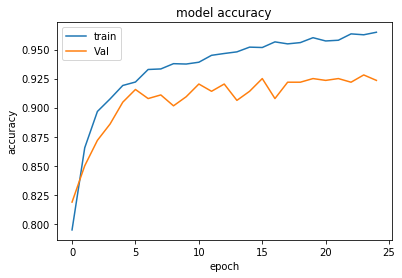

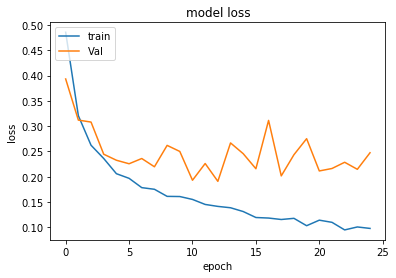

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()